In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import riskfolio as rp
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [18]:
assets = {
    'SPY': 'SP 500',
    'VWRD.L': 'MSCI WORLD',
    '^FCHI': 'CAC 40',
    '^GDAXI': 'DAX 40',
    '^N225': 'NIKKEI 225',
    'BTC-USD': 'BTC',
    'DOGE-USD': 'DOGE',
    'ETH-USD': 'ETH',
    'XRP-USD': 'XRP',
    'ADA-USD': 'ADA',
    'GC=F': 'GOLD',
    'SI=F': 'SILVER',
    'BND': 'US BOND',
    'IXUS': 'WORLD EX-US',
    'TLT': 'US TREASURY',
    'VWO': 'EMERGING MARKETS',
    'BNDX': 'WORLD BOND',
    'VYM': 'HIGH DIVIDEND',
    'VNQ': 'REAL ESTATE',
}

data = yf.download(list(assets.keys()), start='2018-01-01', end='2024-01-01', period='1d')['Adj Close']
data.rename(columns=assets, inplace=True)

returns = data[assets.values()].pct_change().dropna()
returns

[*********************100%%**********************]  19 of 19 completed
C:\Users\trist\AppData\Local\Temp\ipykernel_20340\3800839727.py:26: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data[assets.values()].pct_change().dropna()


Ticker,SP 500,MSCI WORLD,CAC 40,DAX 40,NIKKEI 225,BTC,DOGE,ETH,XRP,ADA,GOLD,SILVER,US BOND,WORLD EX-US,US TREASURY,EMERGING MARKETS,WORLD BOND,HIGH DIVIDEND,REAL ESTATE
Date,,,,,,,,,,,,,,,,,,,
2018-01-05,0.006664,0.004381,0.010540,0.011524,0.008857,0.117333,0.261613,0.017125,-0.046274,-0.102826,0.000682,0.000931,-0.001352,0.006335,-0.002856,0.008853,0.000000,0.004505,0.000494
2018-01-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.005594,0.221583,0.044061,0.014846,0.027603,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-07,0.000000,0.000000,0.000000,0.000000,0.000000,-0.059873,0.149701,0.107029,0.091740,-0.018138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.001828,0.001607,0.003047,0.003614,0.000000,-0.079350,-0.119558,-0.004024,-0.272840,-0.108593,-0.001288,-0.008195,0.000123,-0.000153,-0.000636,0.000209,0.000184,0.001840,0.005182
2018-01-09,0.002263,0.003209,0.006655,0.001332,0.005712,-0.037884,-0.108009,0.131655,-0.144300,-0.093725,-0.005233,-0.007501,-0.002954,0.000154,-0.013372,-0.000209,-0.000552,0.001722,-0.012888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,0.001808,0.008259,0.000396,0.002148,0.011271,0.021694,0.024333,0.065999,0.020064,0.040631,0.011515,0.009568,0.006401,0.004958,0.017720,0.005429,0.005868,0.001074,0.004867
2023-12-28,0.000378,0.002605,-0.004842,-0.002420,-0.004205,-0.018760,-0.018113,-0.013105,0.000224,-0.025434,-0.003843,-0.009887,-0.002436,0.000617,-0.007263,0.006136,-0.003420,0.000179,0.007095
2023-12-29,-0.002895,-0.000335,0.001064,0.002999,-0.002250,-0.012397,-0.009207,-0.019968,-0.018262,-0.014460,-0.005545,-0.011643,-0.002306,0.000462,-0.009020,0.002683,-0.003432,-0.001788,-0.011854


,SP 500,MSCI WORLD,CAC 40,DAX 40,NIKKEI 225,BTC,DOGE,ETH,XRP,ADA,GOLD,SILVER,US BOND,WORLD EX-US,US TREASURY,EMERGING MARKETS,WORLD BOND,HIGH DIVIDEND,REAL ESTATE
weights,25.631751,1.123264,0.000002,0.000001,12.994409,1.706734,3.262933,3.646963,1.469394e-08,2.531237e-08,38.694066,4.391018e-09,1.776025e-08,0.000001,6.949079e-09,0.000002,12.939871,7.828735e-07,0.000002


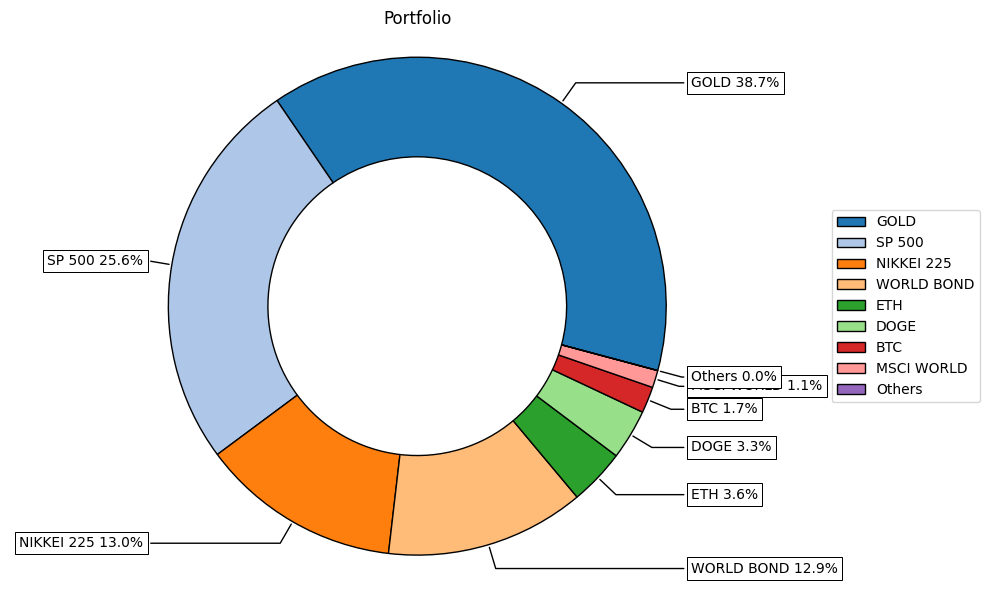

In [123]:
port = rp.Portfolio(returns=returns)
hc_port = rp.HCPortfolio(returns=returns)

port.assets_stats(method_mu='hist', method_cov='hist', d=0.94)


w1 = port.optimization(model='Classic', rm='MV', obj='Sharpe', rf=0, l=0, hist=True) # Sharpe, MinRisk, MaxRet

w2 = port.rp_optimization(model='Classic', rm='MV', rf=0, b=None, hist=True)

w3 = hc_port.optimization(
    model='NCO',
    codependence='pearson', 
    obj='Sharpe', 
    rm='MV', 
    rf=0, 
    linkage='single'
)

ws = port.efficient_frontier(model='Classic', rm='MV', points=30, rf=0, hist=True)


# w1: classic sharpe optimization
# w2: risk parity optimization (equal risk contribution)
# w3: Nested Clustered Optimization

w = w3

display(w.T*100)
ax = rp.plot_pie(w=w, title='Portfolio', others=0.01, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

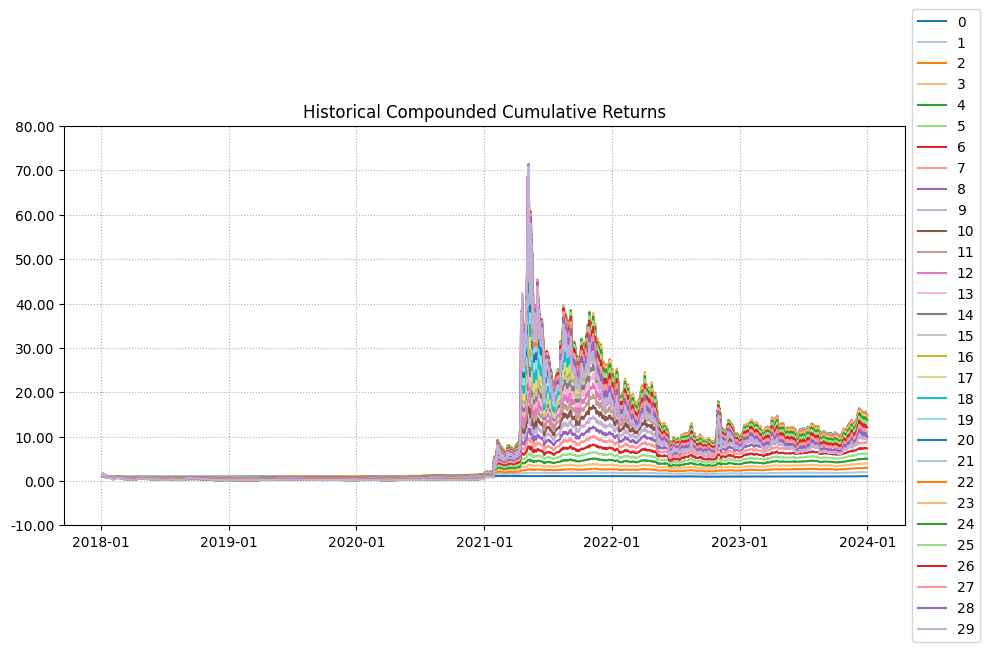

In [124]:
ax = rp.plot_series(returns=returns,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)

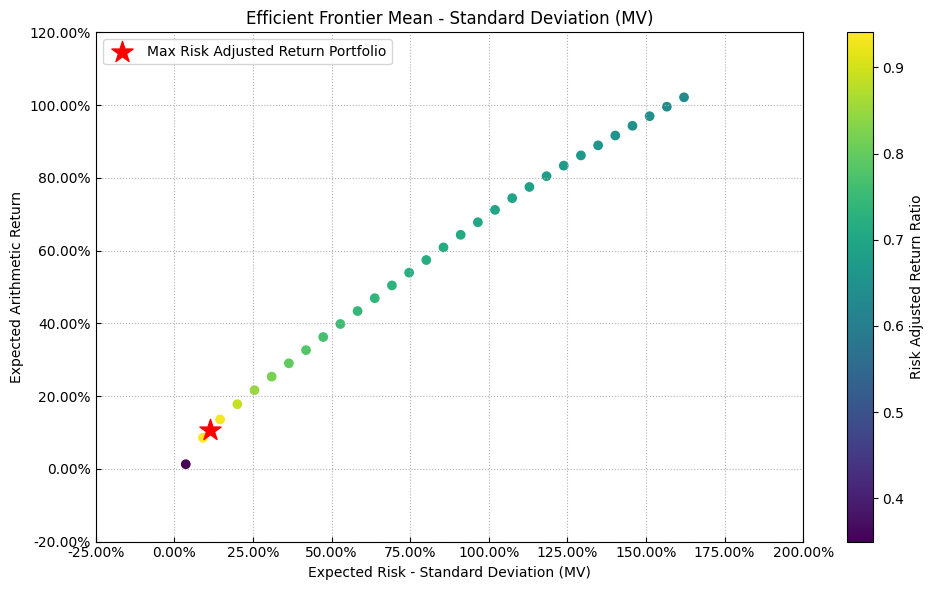

In [125]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm="MV",
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

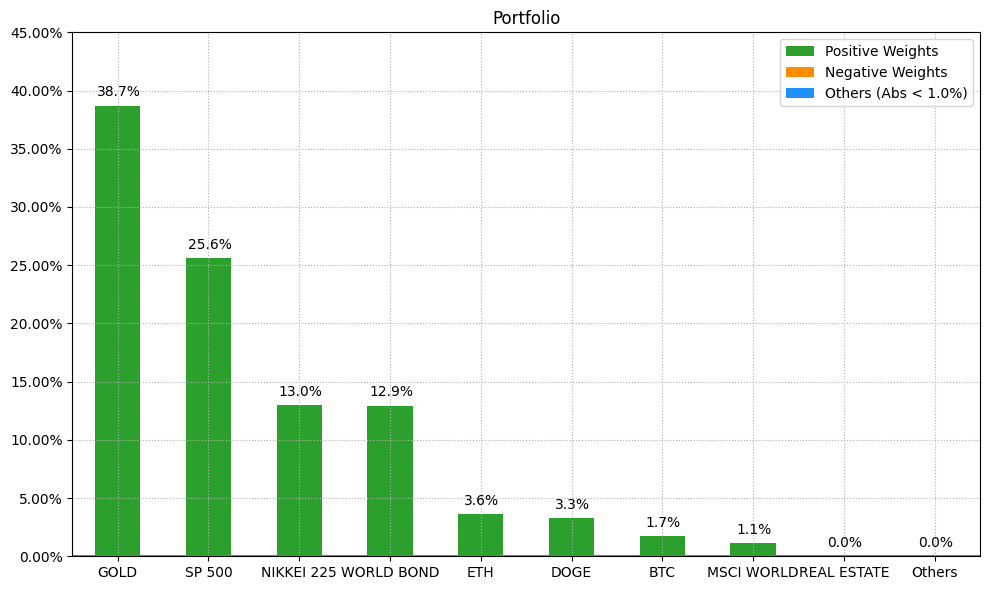

In [126]:
ax = rp.plot_bar(w,
                 title='Portfolio',
                 kind="v",
                 others=0.05,
                 nrow=25,
                 height=6,
                 width=10,
                 ax=None)

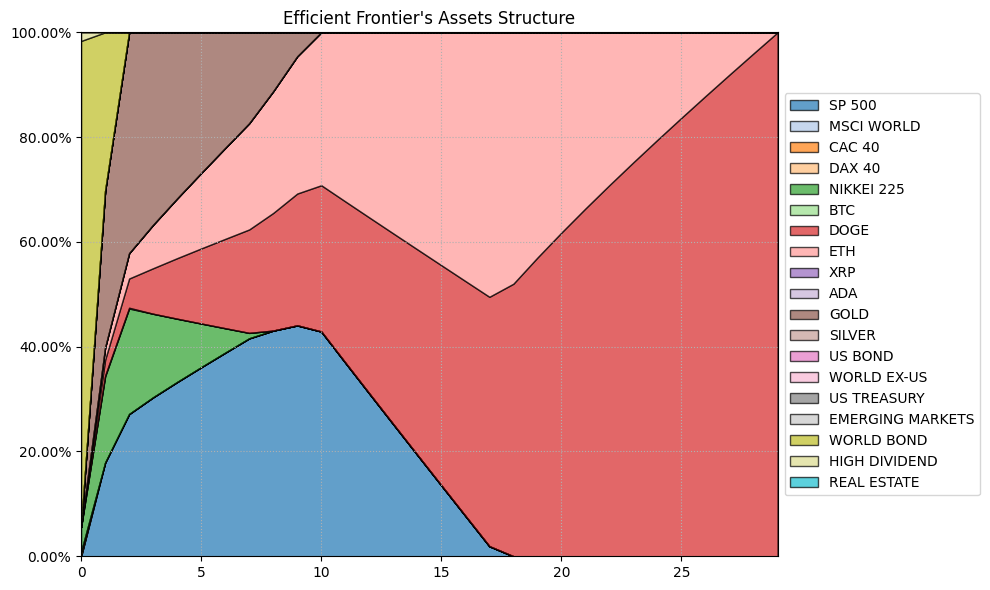

In [127]:
ax = rp.plot_frontier_area(w_frontier=ws,
                           cmap="tab20",
                           height=6,
                           width=10,
                           ax=None)

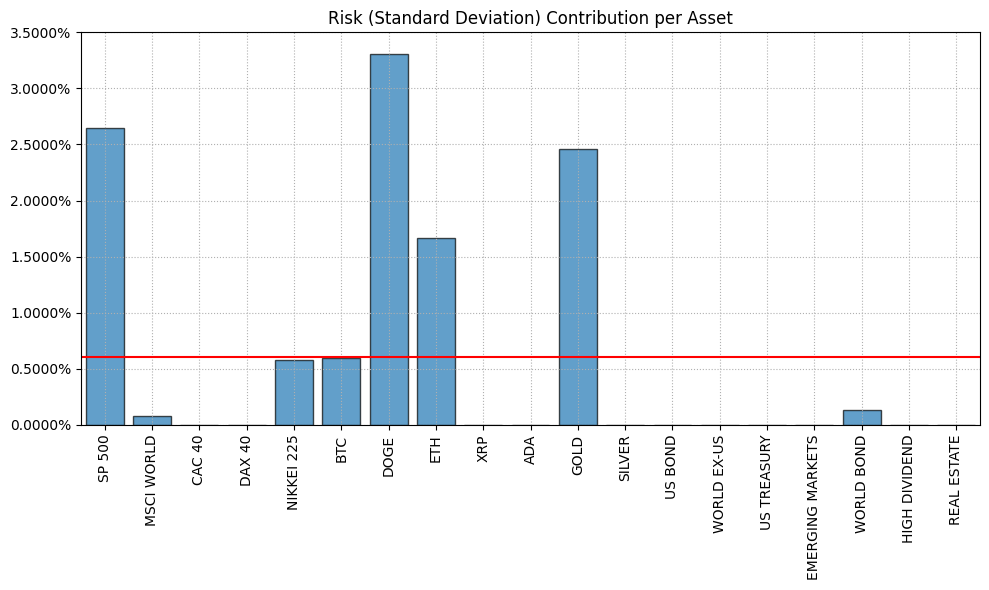

In [128]:
ax = rp.plot_risk_con(w=w,
                      cov=cov,
                      returns=returns,
                      rm="MV",
                      rf=0,
                      alpha=0.05,
                      color="tab:blue",
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

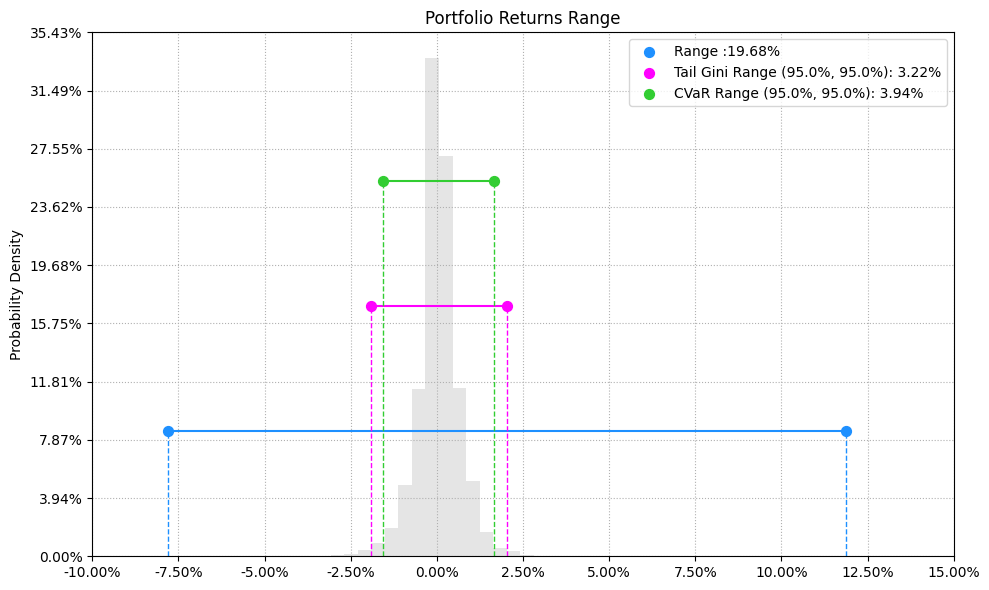

In [129]:
ax = rp.plot_range(returns=returns,
                w=w,
                alpha=0.05,
                a_sim=100,
                beta=None,
                b_sim=None,
                bins=50,
                height=6,
                width=10,
                ax=None)

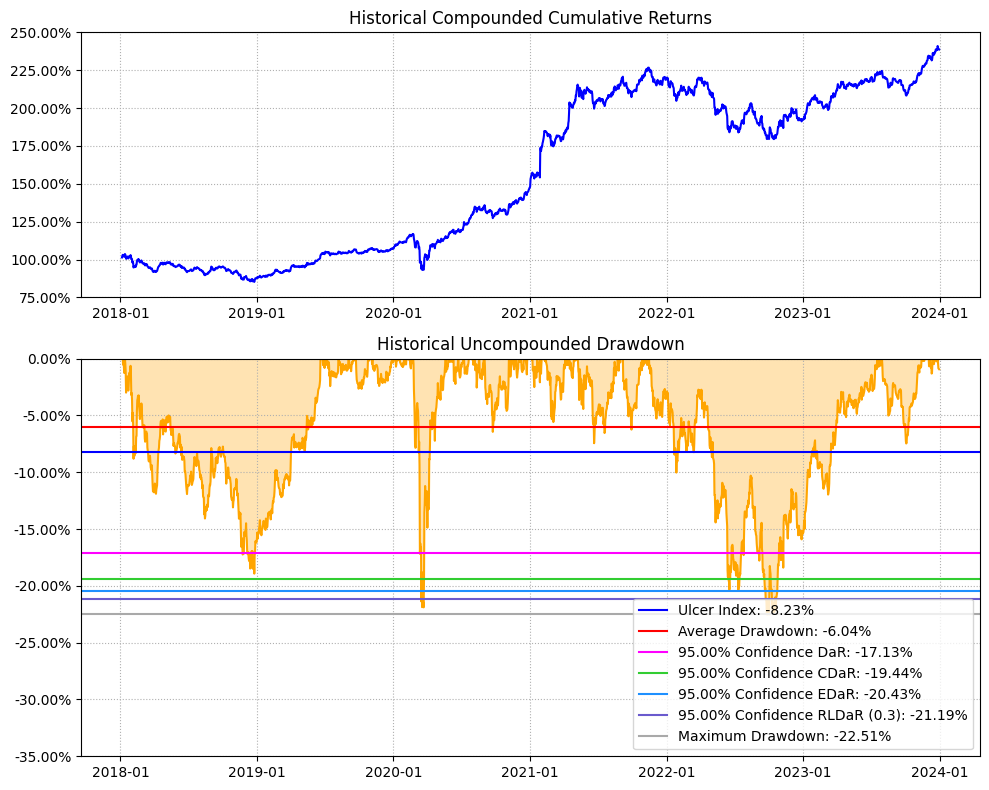

In [130]:
ax = rp.plot_drawdown(returns=returns,
                      w=w,
                      alpha=0.05,
                      height=8,
                      width=10,
                      ax=None)

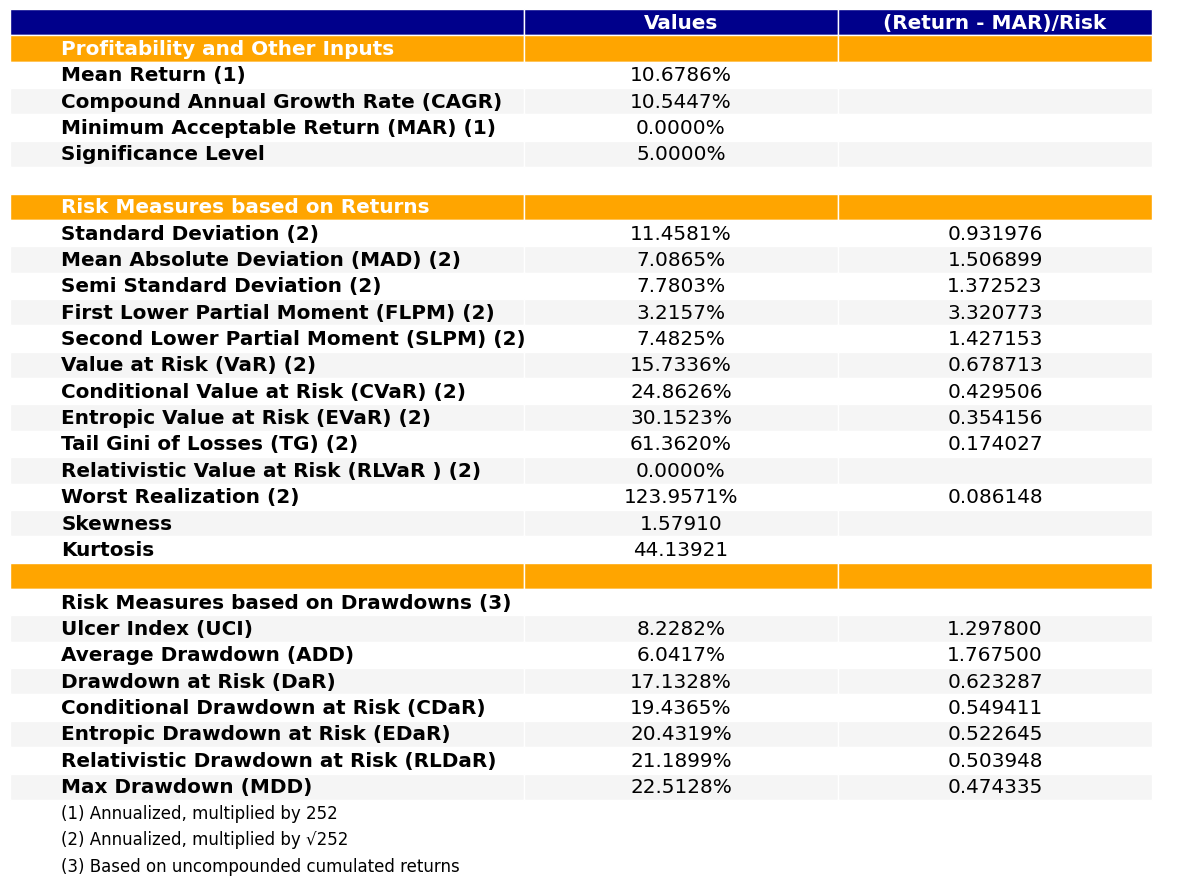

In [131]:
ax = rp.plot_table(returns=returns,
                   w=w,
                   MAR=0,
                   alpha=0.05,
                   ax=None)

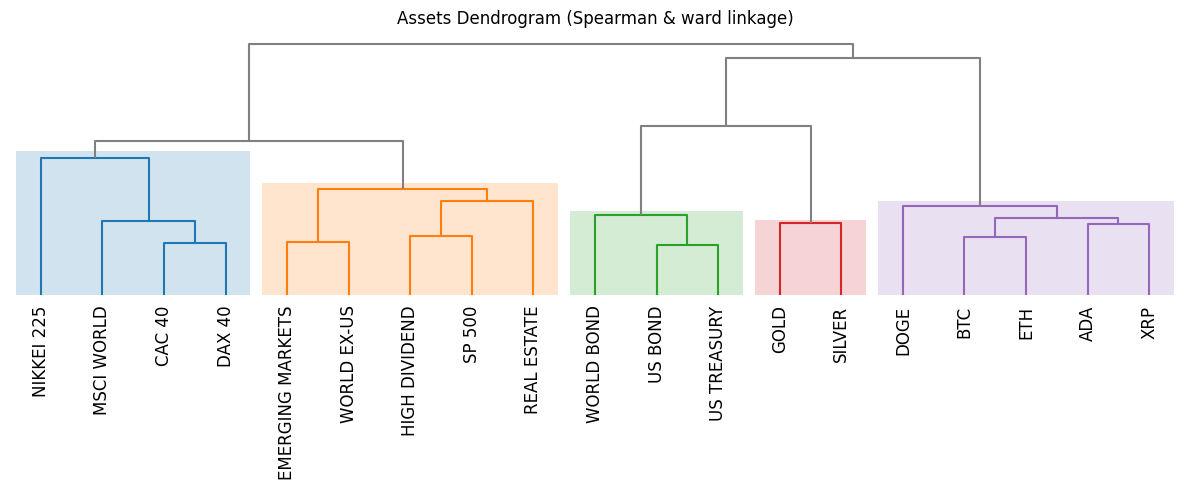

In [132]:
ax = rp.plot_dendrogram(returns=returns,
                        codependence='spearman',
                        linkage='ward',
                        k=None,
                        max_k=10,
                        leaf_order=True,
                        ax=None)

c:\Users\trist\Desktop\YT Demo\Backtest-Tools-V2\.venv\Lib\site-packages\riskfolio\src\PlotFunctions.py:2895: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


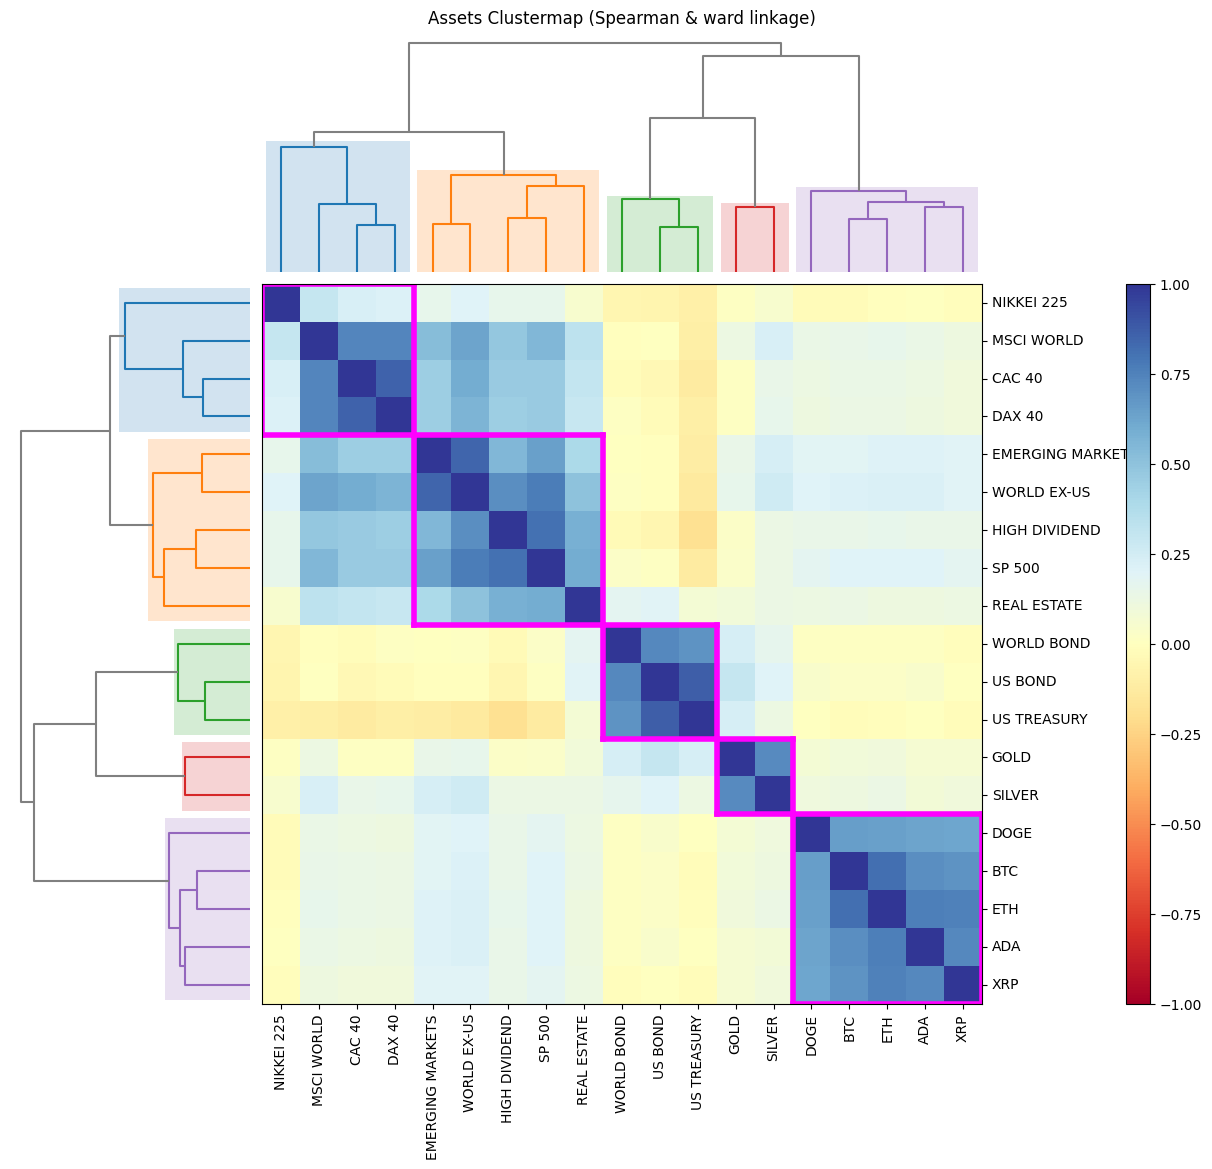

In [133]:
ax = rp.plot_clusters(returns=returns,
                      codependence='spearman',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

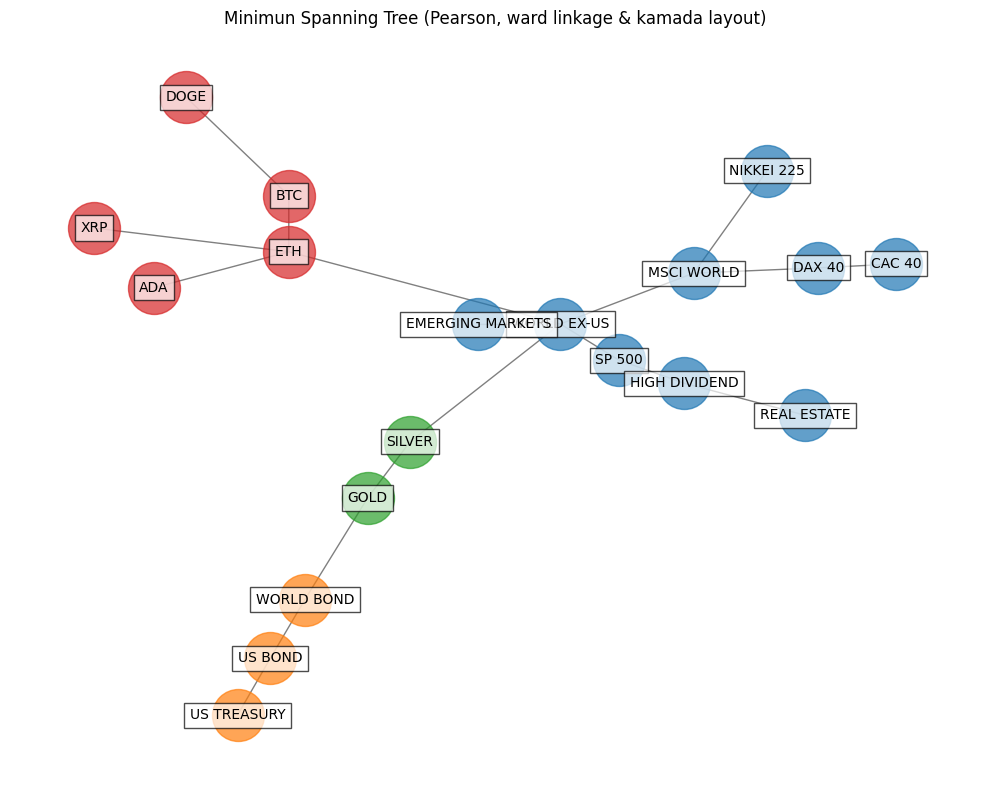

In [134]:
ax = rp.plot_network(returns=returns,
                     codependence="pearson",
                     linkage="ward",
                     k=None,
                     max_k=10,
                     alpha_tail=0.05,
                     leaf_order=True,
                     kind='kamada',
                     ax=None)

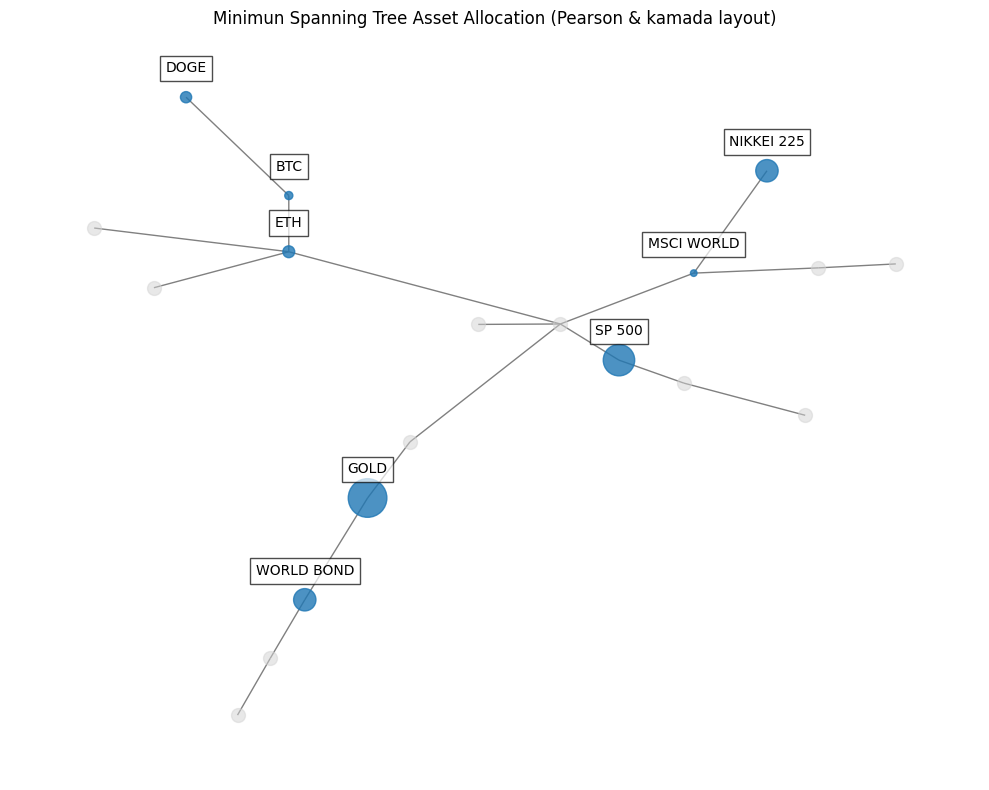

In [135]:
ax = rp.plot_network_allocation(returns=returns,
                                w=w,
                                codependence="pearson",
                                linkage="ward",
                                alpha_tail=0.05,
                                leaf_order=True,
                                kind='kamada',
                                ax=None)